# TUGAS PRAKTIKUM
## 1. K-Means

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'

In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('dataset/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [2]:
X = df[['Age', 'Spending Score (1-100)']]
display(X.head())

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

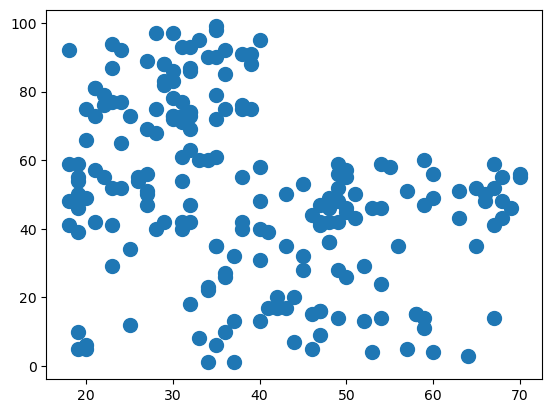

In [3]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)


c:\Users\khoir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


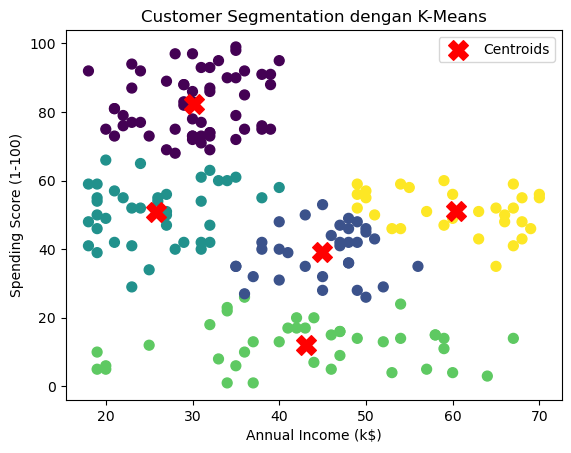

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi cluster
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation dengan K-Means')
plt.legend()
plt.show()

## 2. DBSCAN
1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.


In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Buat dataset make_moons
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi fitur
X = StandardScaler().fit_transform(X)


2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise


In [6]:
from sklearn.cluster import DBSCAN

# DBSCAN awal
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Hitung jumlah cluster (selain noise = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)


Jumlah cluster: 2
Jumlah noise: 0


3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.


In [7]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# Evaluasi clustering
hom = homogeneity_score(y_true, labels)
com = completeness_score(y_true, labels)
v_measure = v_measure_score(y_true, labels)
ari = adjusted_rand_score(y_true, labels)
ami = adjusted_mutual_info_score(y_true, labels)

# Silhouette butuh minimal 2 cluster
sil = silhouette_score(X, labels) if n_clusters > 1 else -1

print("Homogeneity:", hom)
print("Completeness:", com)
print("V-measure:", v_measure)
print("ARI:", ari)
print("AMI:", ami)
print("Silhouette:", sil)

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

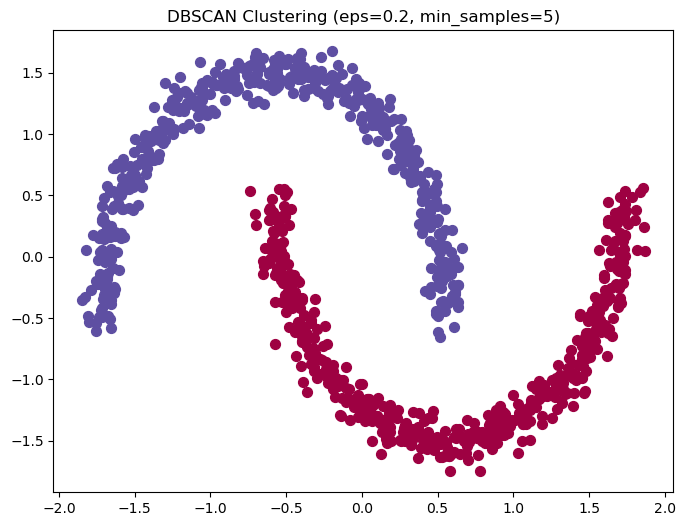

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Mask core sample
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = hitam
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    # Core points
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o')

    # Non-core points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=15, c=[col], marker='o')

plt.title("DBSCAN Clustering (eps=0.2, min_samples=5)")
plt.show()


5. Lakukan eksperimen:
    - eps = 0.05, 0.1, 0.3, 0.5
    - min_samples = 3, 10, 20
    - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [9]:
import pandas as pd

def run_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        sil = silhouette_score(X, labels)
    else:
        sil = -1

    return {
        "eps": eps,
        "min_samples": min_samples,
        "clusters": n_clusters,
        "noise": n_noise,
        "hom": homogeneity_score(y_true, labels),
        "com": completeness_score(y_true, labels),
        "v_measure": v_measure_score(y_true, labels),
        "ari": adjusted_rand_score(y_true, labels),
        "ami": adjusted_mutual_info_score(y_true, labels),
        "silhouette": sil
    }

# Eksperimen
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []
for eps in eps_values:
    for ms in min_samples_values:
        results.append(run_dbscan(eps, ms))

df_results = pd.DataFrame(results)
print(df_results)


     eps  min_samples  clusters  noise       hom       com  v_measure  \
0   0.05            3        69    186  0.815554  0.152548   0.257021   
1   0.05           10         3    970  0.030669  0.126764   0.049389   
2   0.05           20         0   1000  0.000000  1.000000   0.000000   
3   0.10            3         2     14  0.986207  0.902896   0.942714   
4   0.10           10         7     57  0.943317  0.409546   0.571132   
5   0.10           20         6    850  0.153928  0.155466   0.154693   
6   0.20            3         2      0  1.000000  1.000000   1.000000   
7   0.20           10         2      0  1.000000  1.000000   1.000000   
8   0.20           20         2      3  1.000000  0.974224   0.986944   
9   0.30            3         2      0  1.000000  1.000000   1.000000   
10  0.30           10         2      0  1.000000  1.000000   1.000000   
11  0.30           20         2      0  1.000000  1.000000   1.000000   
12  0.50            3         2      0  1.000000  1